In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv("/kaggle/input/credit-card-fraud/card_transdata.csv")

# **Exploratory Data Analysis**

In [3]:
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

from this it can be concluded that the data has a good structure because there is no empty data, and all data types are numeric

In [6]:
df.corr(method="spearman")

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.001068,-0.000152,0.559724,-0.000118,-0.000338,-0.001812,0.095032
distance_from_last_transaction,-0.001068,1.000000,-0.000111,-0.001352,-0.000165,0.000555,-0.001076,0.034661
ratio_to_median_purchase_price,-0.000152,-0.000111,1.000000,0.001202,-0.000099,0.000251,-0.000376,0.342838
repeat_retailer,0.559724,-0.001352,0.001202,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000118,-0.000165,-0.000099,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.000338,0.000555,0.000251,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001812,-0.001076,-0.000376,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.095032,0.034661,0.342838,-0.001357,-0.060975,-0.100293,0.191973,1.000000


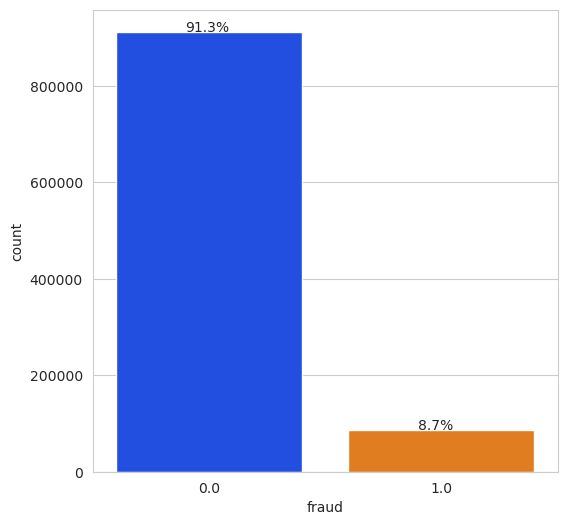

In [7]:
# Create a countplot
plt.figure(figsize=(6,6))
sns.set_palette('bright')
sns.set_style('whitegrid')
ax = sns.countplot(x="fraud", data=df)

# Calculate and display the percentages
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format((height/total) * 100)
    x, y = p.get_xy()
    ax.annotate(percentage, (x + 0.3, y + height + 0.05))

plt.show()

<AxesSubplot:>

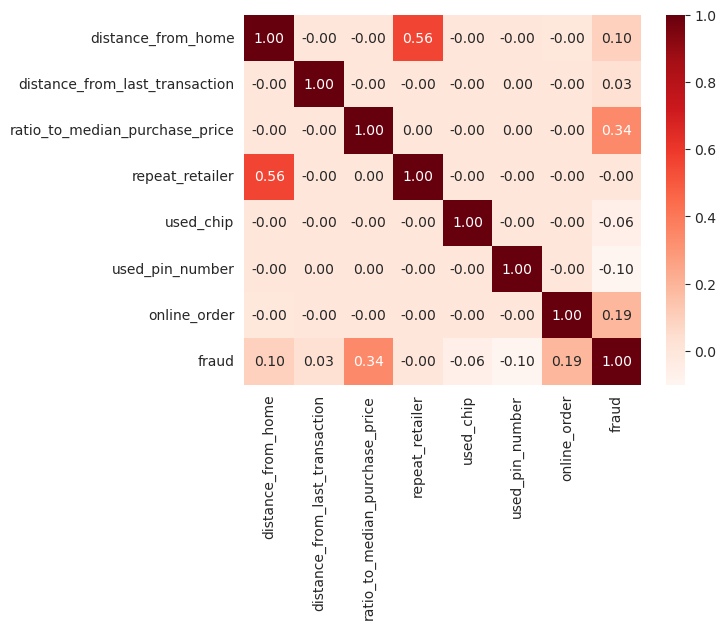

In [8]:
corr = df.corr(method="spearman")
sns.heatmap(corr,cmap="Reds",annot=True, fmt=".2f")

<AxesSubplot:xlabel='fraud', ylabel='count'>

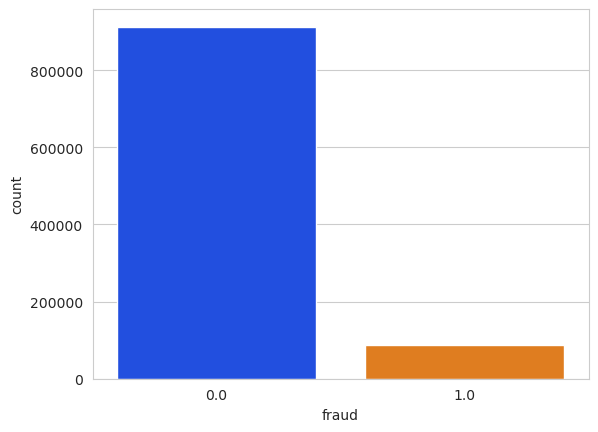

In [9]:
sns.countplot(x="fraud", data=df)

# **Modelling**

In [10]:
X = df.drop(["fraud"], axis = 1)
y = df["fraud"]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
ros = RandomOverSampler()
X_train,y_train = ros.fit_resample(X_train,y_train)
rf = RandomForestClassifier()
model_rf = rf.fit(X_train,y_train)
rf_predict = model_rf.predict(X_test)
print(classification_report(rf_predict,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182443
         1.0       1.00      1.00      1.00     17557

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [12]:
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train,y_train)
dt_predict = model_dt.predict(X_test)
print(classification_report(dt_predict,y_test,))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182442
         1.0       1.00      1.00      1.00     17558

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
dt = DecisionTreeClassifier()
model_dt = dt.fit(X_train,y_train)
dt_predict = model_dt.predict(X_test)
print(classification_report(dt_predict,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182600
         1.0       1.00      1.00      1.00     17400

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



# Summary 
# This means that credit fraud currently cannot be detected using a correlation point between 2 variables, companies need more sophisticated analysis techniques such as using Machine Learning to see anomalies in a transaction.